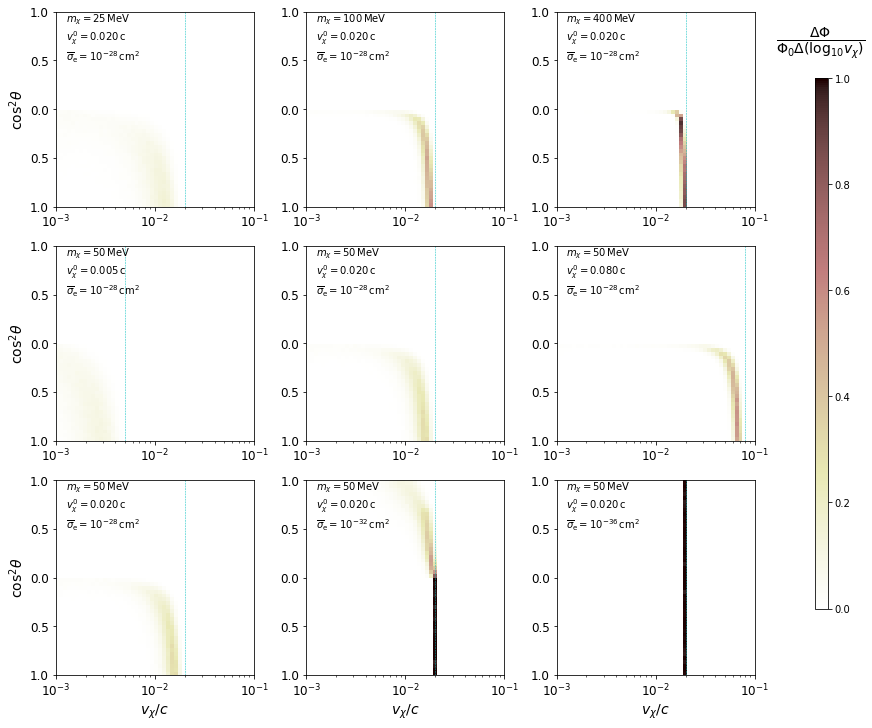

In [2]:
### F(q) = 1, logv ~ cos^2, N = 100000 ###
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


fig, ax = plt.subplots(3,3,figsize=(12,10),constrained_layout=True)
ax = ax.flatten()

images = []
for i in np.arange(9):
    
    if i < 3:
        a = [2.5,1,4]
        b = [7,8,8]
        file = np.loadtxt('%se%s_1e-28_0.02_ctheta_velo_weight.txt'%(a[i],b[i]))
        file[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
            
        im = ax[i].hist2d(file[:,1],file[:,0],
                          bins=[np.logspace(-3,-1,51),np.linspace(-1.,1.,51)],
                          cmap='pink_r',rasterized=True)
    
        ax[i].vlines(0.020,-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=%d\,\mathrm{MeV}$'%(a[i]*10 if i==0 else a[i]*100) +'\n'+ r'$v^{0}_{\chi}=0.020\,\mathrm{c}$'+'\n'+r'$\overline{\sigma}_{\mathrm{e}}= 10^{-28}\,\mathrm{cm^2}$',
                       xy=(0.05,0.75),xycoords='axes fraction',size=10)    
        
    elif i < 6:
        
        d = [0.005, 0.02, 0.08]
        file = np.loadtxt('5e7_1e-28_%s_ctheta_velo_weight.txt'%d[i-3])
        file[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
            
        im = ax[i].hist2d(file[:,1],file[:,0],
                    bins=[np.logspace(-3,-1,51),np.linspace(-1.,1.,51)],                     
                    cmap='pink_r',rasterized=True)
        ax[i].vlines(d[i-6],-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=50\,\mathrm{MeV}$'+'\n'+r'$v^{0}_{\chi}=%.3f\,\mathrm{c}$'%d[i-6]+'\n'+r'$\overline{\sigma}_{\mathrm{e}}= 10^{-28}\,\mathrm{cm^2}$'
                    ,xy=(0.05,0.75),xycoords='axes fraction',size=10)
    else:
        
        c = [-28, -32, -36]
        file = np.loadtxt('5e7_1e%d_0.02_ctheta_velo_weight.txt'%c[i-6])
        file[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
            
        im = ax[i].hist2d(file[:,1],file[:,0],
                    bins=[np.logspace(-3,-1,51),np.linspace(-1.,1.,51)],                     
                    cmap='pink_r',rasterized=True)
        ax[i].vlines(0.020,-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=50\,\mathrm{MeV}$' +'\n'+r'$v^{0}_{\chi}=0.020\,\mathrm{c}$'+'\n'+r'$\overline{\sigma}_{\mathrm{e}}= 10^{%d}\,\mathrm{cm^2}$'%c[i-6]
                   ,xy=(0.05,0.75),xycoords='axes fraction',size=10)
        
    ax[i].set_xscale('log')    
    ax[i].tick_params(labelsize='large')
    ax[i].set_yticks([-1,-0.5,0,0.5,1])
    ax[i].set_yticklabels([1.0,0.5,0.0,0.5,1.0])

    if i in [6,7,8]:
        ax[i].set_xlabel(r'$v_{\chi}/c$',fontsize=14)
    if i in [0,3,6]: 
        ax[i].set_ylabel(r'$\cos^{2}{\theta}$',fontsize=14) 

    file = file[file[:,1]>1e-3]
    im[-1].get_array()[:] /= 2e5/50
    images.append(im[-1])
    
norm = colors.Normalize(vmin=0,vmax=1)
[im.set_norm(norm) for im in images]

cb = fig.colorbar(images[0], ax=[ax[i] for i in range(0,9)],shrink=0.8,aspect=40,pad=0.001)
cb.set_label(r'$\frac{\Delta{\Phi}}{{\Phi_{0}}{\Delta(\mathrm{log_{10}}v_{\chi})}}$',labelpad=-30,y=1.1,rotation=0,fontsize=20)

plt.savefig('Vdistribution.pdf')
plt.savefig('Vdistribution.png')
plt.show()